In [1]:
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
import example_deeper
import certa.metrics

In [26]:
n_tuples = 20
n_triangles = [8, 30, 50]
#with higher values makes the thresholds (theta_min, theta_max) stricter
threshold_tuning = -2

tests = {
    "cosine" : example_deeper.run(certa.metrics.get_cosine, n_tuples, n_triangles),
    "euclidean" : example_deeper.run(certa.metrics.euclidean_distance, n_tuples, n_triangles),
    "manhattan" : example_deeper.run(certa.metrics.manhattan_distance, n_tuples, n_triangles),
    "mahalanobis" : example_deeper.run(certa.metrics.mahalanobis_distance, n_tuples, n_triangles),
    "jaccard" : example_deeper.run(certa.metrics.jaccard_similarity, n_tuples, n_triangles),
}

In [27]:
tests_results = {}
for test_name, test in tests.items():
    print("Starting test for:", test_name)
    results = []
    for _, _, mean, impact in test:
        result = mean, impact
        print(result)
        results.append(result)
    tests_results[test_name] = results

Starting test for: cosine
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Tupla_A (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Tupla_B (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Embedding_lookup (Embedding)    (None, None, 50)     20000100    Tupla_A[0][0]                    
                                                                 Tupla_B[0][0]                    
Total params: 20,000,100
Trainable params: 0
Non-trainable params: 20,000,100
_______________________________________________________________________________________

100%|██████████| 8/8 [00:01<00:00,  6.06it/s]
0it [00:00, ?it/s]
100%|██████████| 8/8 [00:01<00:00,  5.49it/s]


nt: 8 
# of unsuccessful pairs: 0 / 20
(0.04174326290917951, 0.011627906976744186)


100%|██████████| 30/30 [00:05<00:00,  5.89it/s]


nt: 30 
# of unsuccessful pairs: 0 / 20
(0.03731748612621163, 0.012658227848101266)


100%|██████████| 50/50 [00:07<00:00,  6.38it/s]


nt: 50 
# of unsuccessful pairs: 0 / 20
(0.03852328825099715, 0.01293103448275862)
Starting test for: euclidean
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Tupla_A (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Tupla_B (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Embedding_lookup (Embedding)    (None, None, 50)     20000100    Tupla_A[0][0]                    
                                                                 Tupla_B[0][0]                    
Total params: 20,000,100
Trainable params: 0
Non-trainable params: 20,000,100
_

100%|██████████| 2/2 [00:00<00:00,  8.59it/s]


nt: 8 
# of unsuccessful pairs: 0 / 20
(0.04611856148049638, 0.02702702702702703)


100%|██████████| 20/20 [00:02<00:00,  7.66it/s]


nt: 30 
# of unsuccessful pairs: 0 / 20
(0.046214196132496, 0.0390625)


100%|██████████| 20/20 [00:02<00:00,  7.13it/s]


nt: 50 
# of unsuccessful pairs: 0 / 20
(0.052337438705262175, 0.03932584269662921)
Starting test for: manhattan
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Tupla_A (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Tupla_B (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Embedding_lookup (Embedding)    (None, None, 50)     20000100    Tupla_A[0][0]                    
                                                                 Tupla_B[0][0]                    
Total params: 20,000,100
Trainable params: 0
Non-trainable params: 20,000,100


100%|██████████| 4/4 [00:00<00:00,  9.27it/s]


nt: 8 
# of unsuccessful pairs: 0 / 20
(0.05484338014414816, 0.030303030303030304)


100%|██████████| 17/17 [00:02<00:00,  7.46it/s]


nt: 30 
# of unsuccessful pairs: 0 / 20
(0.049766216013166636, 0.03968253968253968)


100%|██████████| 22/22 [00:03<00:00,  7.20it/s]


nt: 50 
# of unsuccessful pairs: 0 / 20
(0.06110704436581185, 0.047872340425531915)
Starting test for: mahalanobis
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Tupla_A (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Tupla_B (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Embedding_lookup (Embedding)    (None, None, 50)     20000100    Tupla_A[0][0]                    
                                                                 Tupla_B[0][0]                    
Total params: 20,000,100
Trainable params: 0
Non-trainable params: 20,000,10

100%|██████████| 5/5 [00:00<00:00,  7.86it/s]


nt: 8 
# of unsuccessful pairs: 0 / 20
(0.0501354558345599, 0.0641025641025641)


100%|██████████| 9/9 [00:01<00:00,  7.89it/s]


nt: 30 
# of unsuccessful pairs: 0 / 20
(0.057765130314134785, 0.06451612903225806)


100%|██████████| 23/23 [00:02<00:00,  8.97it/s]


nt: 50 
# of unsuccessful pairs: 0 / 20
(0.06653377739177353, 0.06321839080459771)
Starting test for: jaccard
Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Tupla_A (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Tupla_B (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Embedding_lookup (Embedding)    (None, None, 50)     20000100    Tupla_A[0][0]                    
                                                                 Tupla_B[0][0]                    
Total params: 20,000,100
Trainable params: 0
Non-trainable params: 20,000,100
__

100%|██████████| 8/8 [00:00<00:00,  8.34it/s]


nt: 8 
# of unsuccessful pairs: 0 / 20
(0.036972423962184364, 0.04285714285714286)


100%|██████████| 25/25 [00:03<00:00,  7.75it/s]


nt: 30 
# of unsuccessful pairs: 0 / 20
(0.036003958155859765, 0.04477611940298507)


100%|██████████| 49/49 [00:05<00:00,  8.31it/s]


nt: 50 
# of unsuccessful pairs: 0 / 20
(0.034605587880636, 0.03608247422680412)


In [28]:
tests_results

{'cosine': [(0.04174326290917951, 0.011627906976744186),
  (0.03731748612621163, 0.012658227848101266),
  (0.03852328825099715, 0.01293103448275862)],
 'euclidean': [(0.04611856148049638, 0.02702702702702703),
  (0.046214196132496, 0.0390625),
  (0.052337438705262175, 0.03932584269662921)],
 'manhattan': [(0.05484338014414816, 0.030303030303030304),
  (0.049766216013166636, 0.03968253968253968),
  (0.06110704436581185, 0.047872340425531915)],
 'mahalanobis': [(0.0501354558345599, 0.0641025641025641),
  (0.057765130314134785, 0.06451612903225806),
  (0.06653377739177353, 0.06321839080459771)],
 'jaccard': [(0.036972423962184364, 0.04285714285714286),
  (0.036003958155859765, 0.04477611940298507),
  (0.034605587880636, 0.03608247422680412)]}

In [29]:
#utility functions


to_feature_index = {
    "mean_drop": 0, 
    "impact": 1
}

'''
extracts single feature from the results of a single metric test based on the name

example: 

results = [(1, 2), (0, 50)]
feature_name = "mean_drop"

output = [1, 0]
'''
def get_feature(results, feature_name):
    feature_name = feature_name.lower()
    feature_index = to_feature_index[feature_name]
    feature_results = []
    for result in results:
        feature_results.append(result[feature_index])
    return feature_results


def get_mean_drops(results):
    return get_feature(results, "mean_drop")
    
def get_impacts(results):
    return get_feature(results, "impact")


def plot_results(mean_metrics_results, title): 
    plt.bar(range(len(mean_metrics_results)), list(mean_metrics_results.values()), align='center')
    plt.xticks(range(len(mean_metrics_results)), list(mean_metrics_results.keys()))
    plt.title(title)
    plt.show()
'''
extracts single feature from the results of all the metric tests

example: 

all_results = {
    "cosine": [(20, 10), (-15, 0)],
    "euclidean": [(77, 12), (42, -13)],
}

feature_name = "mean_drop"

output = {
    "cosine": [20, -15],
    "euclidean": [77, 42],
}
'''
def extract_feature(all_results, feature_name):
    all_results_copy = all_results.copy()
    for test_name, results_raw in all_results_copy.items():
        results_filtered = get_feature(results_raw, feature_name)
        all_results_copy[test_name] = results_filtered
    return all_results_copy


def mean_feature(feature_results):
    import statistics
    mean_results = {}
    for test_name, results in feature_results.items():
        mean_results[test_name] = statistics.mean(results)
    return mean_results

In [30]:
extract_feature(tests_results, "mean_drop")

{'cosine': [0.04174326290917951, 0.03731748612621163, 0.03852328825099715],
 'euclidean': [0.04611856148049638, 0.046214196132496, 0.052337438705262175],
 'manhattan': [0.05484338014414816, 0.049766216013166636, 0.06110704436581185],
 'mahalanobis': [0.0501354558345599,
  0.057765130314134785,
  0.06653377739177353],
 'jaccard': [0.036972423962184364, 0.036003958155859765, 0.034605587880636]}

In [31]:
extract_feature(tests_results, "impact")

{'cosine': [0.011627906976744186, 0.012658227848101266, 0.01293103448275862],
 'euclidean': [0.02702702702702703, 0.0390625, 0.03932584269662921],
 'manhattan': [0.030303030303030304,
  0.03968253968253968,
  0.047872340425531915],
 'mahalanobis': [0.0641025641025641, 0.06451612903225806, 0.06321839080459771],
 'jaccard': [0.04285714285714286, 0.04477611940298507, 0.03608247422680412]}

In [32]:
drops = extract_feature(tests_results, "mean_drop")
mean_drops = mean_feature(drops)
mean_drops

{'cosine': 0.039194679095462766,
 'euclidean': 0.048223398772751516,
 'manhattan': 0.05523888017437555,
 'mahalanobis': 0.05814478784682274,
 'jaccard': 0.03586065666622671}

In [33]:
impacts = extract_feature(tests_results, "impact")
mean_impacts = mean_feature(impacts)
mean_impacts

{'cosine': 0.012405723102534691,
 'euclidean': 0.03513845657455208,
 'manhattan': 0.039285970137033964,
 'mahalanobis': 0.06394569464647329,
 'jaccard': 0.04123857882897735}

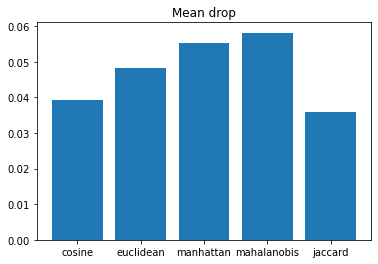

In [34]:
plot_results(mean_drops, "Mean drop")

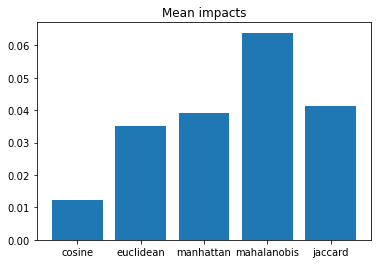

In [35]:
plot_results(mean_impacts, "Mean impacts")

## Save Results

In [45]:
import os
import pandas as pd 

def add_parameter_info(dataframe):
    dataframe = dataframe.copy()
    dataframe["tuples"] = n_tuples
    dataframe["triangles"] = [n_triangles]
    dataframe["threshold"] = threshold_tuning
    return dataframe

def save_benchmark(dataframe, path):
    if os.path.exists(path):
        dataframe.to_csv(path, mode="a", index=False, header=False)
    else:
        dataframe.to_csv(path, mode="a", index=False)

In [42]:
drops_benchmark = pd.DataFrame([mean_drops])
drops_benchmark = add_parameter_info(drops_benchmark)

drops_benchmark

,cosine,euclidean,manhattan,mahalanobis,jaccard,tuples,triangles,threshold
0,0.039195,0.048223,0.055239,0.058145,0.035861,20,"[8, 30, 50]",-2


In [44]:
impacts_benchmark = pd.DataFrame([mean_impacts])
impacts_benchmark = add_parameter_info(impacts_benchmark)

impacts_benchmark

,cosine,euclidean,manhattan,mahalanobis,jaccard,tuples,triangles,threshold
0,0.012406,0.035138,0.039286,0.063946,0.041239,20,"[8, 30, 50]",-2


In [46]:
save_path_drops = "mean_drops_benchmarks.csv"
save_path_impacts = "mean_impacts_benchmark.csv"

save_benchmark(drops_benchmark, save_path_drops)
save_benchmark(impacts_benchmark, save_path_impacts)

In [48]:
pd.read_csv(save_path_drops)

,cosine,euclidean,manhattan,mahalanobis,jaccard,tuples,triangles,threshold
0,0.048978,0.005717,0.030590,0.038539,0.048978,2,"[2, 5]",-2
1,0.039195,0.048223,0.055239,0.058145,0.035861,20,"[8, 30, 50]",-2


In [49]:
pd.read_csv(save_path_impacts)

,cosine,euclidean,manhattan,mahalanobis,jaccard,tuples,triangles,threshold
0,0.012406,0.035138,0.039286,0.063946,0.041239,20,"[8, 30, 50]",-2
